In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
left = df[df.Exited == 1]
left.shape

(2037, 14)

In [4]:
secured = df[df.Exited == 0]
secured.shape

(7963, 14)

In [5]:
df.groupby('Exited').mean(numeric_only=True)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [9]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Geography'>

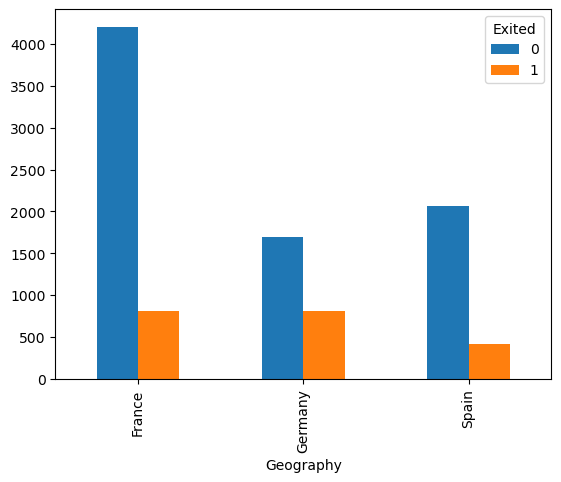

In [10]:
pd.crosstab(df.Geography,df.Exited).plot(kind='bar')

<Axes: xlabel='Gender'>

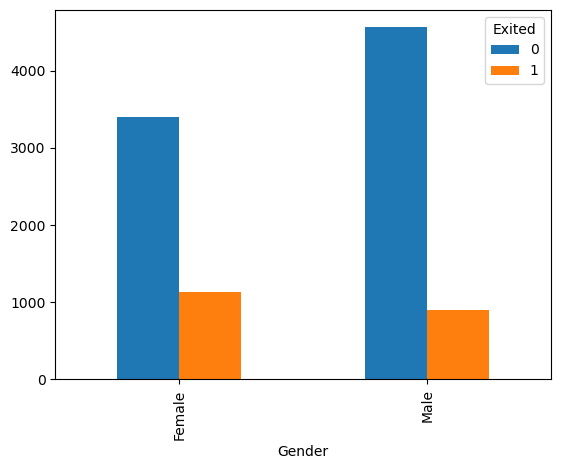

In [11]:
pd.crosstab(df.Gender,df.Exited).plot(kind='bar')

(array([[ 318.,  803.,  847.,  796.,  786.,  803.,  771.,  851.,  828.,
         1160.],
        [  95.,  232.,  201.,  213.,  203.,  209.,  196.,  177.,  197.,
          314.]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 2 BarContainer objects>)

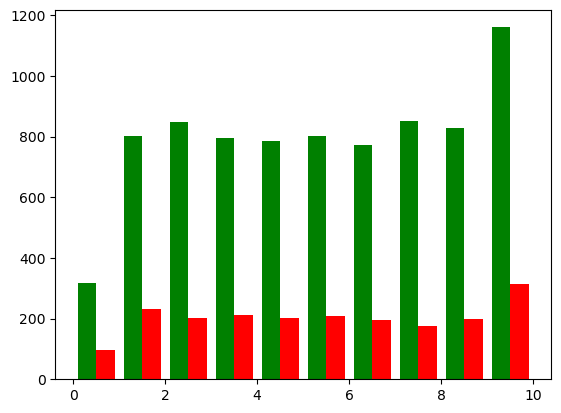

In [14]:
tenure_Exited_no = df[df.Exited == 0].Tenure
tenure_Exited_yes = df[df.Exited == 1].Tenure

plt.hist([tenure_Exited_no, tenure_Exited_yes ], color=['green','red'])

(array([[789., 772., 815., 815., 806., 816., 811., 776., 784., 779.],
        [198., 196., 191., 212., 196., 211., 196., 206., 225., 206.]]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <a list of 2 BarContainer objects>)

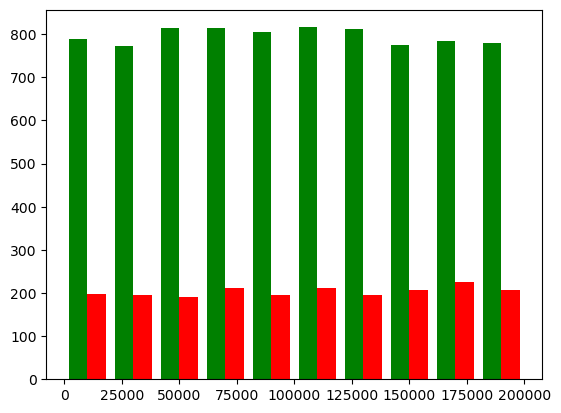

In [15]:
EstimatedSalary_Exited_no = df[df.Exited == 0].EstimatedSalary
EstimatedSalary_Exited_yes = df[df.Exited == 1].EstimatedSalary

plt.hist([EstimatedSalary_Exited_no, EstimatedSalary_Exited_yes ], color=['green','red'])

(array([[3.119e+03, 4.700e+01, 2.800e+02, 9.470e+02, 1.522e+03, 1.319e+03,
         5.730e+02, 1.430e+02, 1.300e+01, 0.000e+00],
        [5.040e+02, 2.200e+01, 8.000e+01, 2.260e+02, 5.590e+02, 4.280e+02,
         1.560e+02, 4.300e+01, 1.700e+01, 2.000e+00]]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <a list of 2 BarContainer objects>)

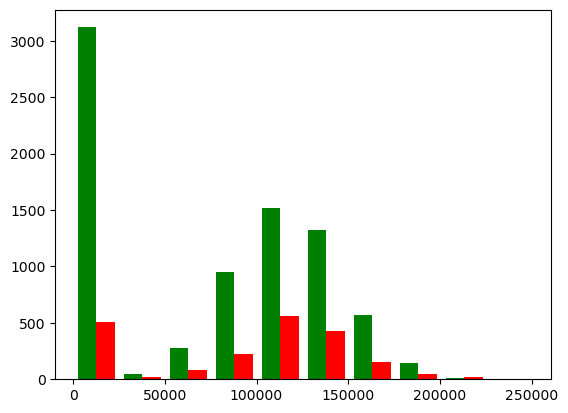

In [16]:
Balance_Exited_no = df[df.Exited == 0].Balance
Balance_Exited_yes = df[df.Exited == 1].Balance

plt.hist([Balance_Exited_no ,Balance_Exited_yes ], color=['green','red'])

In [17]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [40]:
na_values = df.isna().sum()
na_values

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [18]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [20]:
print_unique_col_values(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [25]:
df1 = pd.get_dummies(data=df, columns=['Geography','Gender'])
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [26]:
col_to_scale = ['CreditScore','Age','Balance','Tenure','EstimatedSalary','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])

In [27]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,True,False,False,True,False
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,False,False,True,True,False
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,True,False,False,True,False
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,True,False,False,True,False
4,1.000,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,False,False,True,True,False


In [28]:
X = df1.drop(['Exited'], axis='columns')
y = df1.Exited

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [42]:
model.score(X_test, y_test)

0.806

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(C=10), X, y, cv=5)

array([0.811 , 0.8085, 0.8085, 0.818 , 0.8025])